In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt
from keras.layers import Dense, Input

In [10]:
# Correct the number of column names manually
column_names = [
    "ID", "Diagnosis",  # First two columns: ID and Diagnosis
    # 30 feature columns (as per the dataset documentation)
    "radius_mean", "texture_mean", "perimeter_mean", "area_mean", "smoothness_mean",
    "compactness_mean", "concavity_mean", "concave_points_mean", "symmetry_mean", "fractal_dimension_mean",
    "radius_se", "texture_se", "perimeter_se", "area_se", "smoothness_se",
    "compactness_se", "concavity_se", "concave_points_se", "symmetry_se", "fractal_dimension_se",
    "radius_worst", "texture_worst", "perimeter_worst", "area_worst", "smoothness_worst",
    "compactness_worst", "concavity_worst", "concave_points_worst", "symmetry_worst", "fractal_dimension_worst"
]

# Now load the data from wdbc.data
df = pd.read_csv('breast_cancer_dataset/wdbc.data', header=None)

# Assign the manually defined column names to the DataFrame
df.columns = column_names

# Display the first few rows of the dataset
df.head()


,ID,Diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [11]:
# Drop the ID column as it is not useful for modeling
df = df.drop("ID", axis=1)

# Encode the 'Diagnosis' column (M -> 1, B -> 0)
df['Diagnosis'] = df['Diagnosis'].map({'M': 1, 'B': 0})

# Separate features (X) and target (y)
X = df.drop("Diagnosis", axis=1)  # Features
y = df["Diagnosis"]  # Target

# Standardize the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Print the shapes to confirm
print(f"Training data shape: {X_train.shape}, Testing data shape: {X_test.shape}")


Training data shape: (455, 30), Testing data shape: (114, 30)


In [12]:

# Initialize the model
model = Sequential()

# Define the input layer explicitly using Input
model.add(Input(shape=(X_train.shape[1],)))

# Add the first hidden layer
model.add(Dense(16, activation='relu'))

# Add the second hidden layer
model.add(Dense(8, activation='relu'))

# Add the output layer
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()



Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 16)                  │             496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 641 (2.50 KB)

 Trainable params: 641 (2.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.6416 - loss: 0.6178 - val_accuracy: 0.7692 - val_loss: 0.4605
Epoch 2/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8407 - loss: 0.3998 - val_accuracy: 0.8571 - val_loss: 0.3376
Epoch 3/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9070 - loss: 0.2947 - val_accuracy: 0.8901 - val_loss: 0.2678
Epoch 4/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9518 - loss: 0.2129 - val_accuracy: 0.8901 - val_loss: 0.2274
Epoch 5/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9482 - loss: 0.1792 - val_accuracy: 0.9231 - val_loss: 0.2021
Epoch 6/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9702 - loss: 0.1534 - val_accuracy: 0.9231 - val_loss: 0.1841
Epoch 7/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9758 - loss: 0.1269 - val_accuracy: 0.9231 - val_loss: 0.1713
Epoch 8/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9575 - loss: 0.1266 - val_accuracy: 0.9341 - 

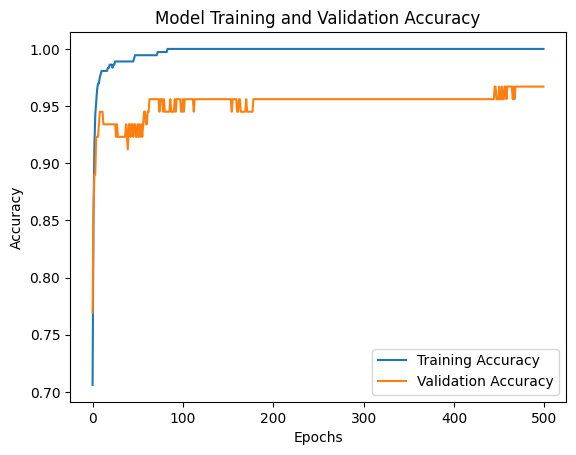

In [13]:
# Train the model
history = model.fit(X_train, y_train, epochs=500, batch_size=16, validation_split=0.2, verbose=1)

# Plot the training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Training and Validation Accuracy')

# Save the plot as an image file
plt.savefig('training_validation_accuracy.png')  # Save as a PNG file
plt.show()


In [14]:
# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9738 - loss: 0.3294
Test Loss: 0.2309
Test Accuracy: 0.9737


In [15]:
# Save the trained model in the recommended Keras format
model.save('breast_cancer_model.keras')

# Save the scaler for preprocessing
import joblib
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Classification Report:
              precision    recall  f1-score   support

      Benign       0.96      1.00      0.98        71
   Malignant       1.00      0.93      0.96        43

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Confusion Matrix:
[[71  0]
 [ 3 40]]


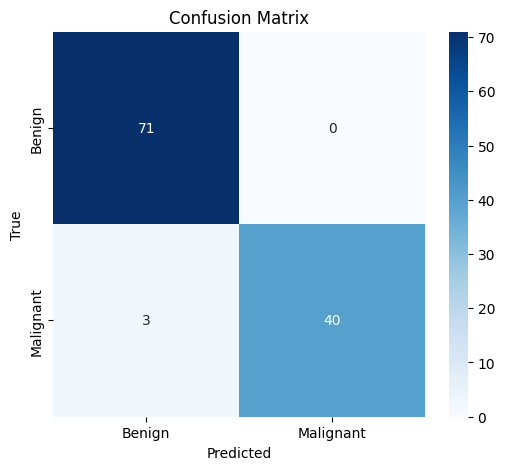

In [16]:

# Predict on test data
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)

# Generate classification metrics
report = classification_report(y_test, y_pred_classes, target_names=['Benign', 'Malignant'])
print("Classification Report:")
print(report)

# Save classification report to a text file
with open('classification_report.txt', 'w') as f:
    f.write(report)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)
print("Confusion Matrix:")
print(cm)

# Save confusion matrix as an image
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Save the confusion matrix as an image file
plt.savefig('confusion_matrix.png')  # Save as PNG
plt.show()


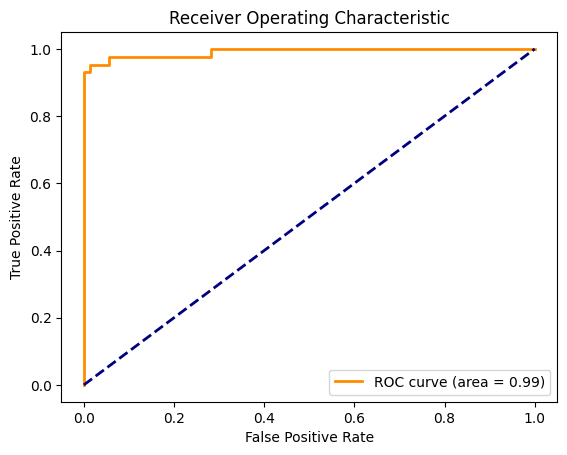

In [17]:

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

# Save the ROC curve plot as an image file
plt.savefig('roc_curve.png')  # Save as a PNG file
plt.show()
